## Questão 1

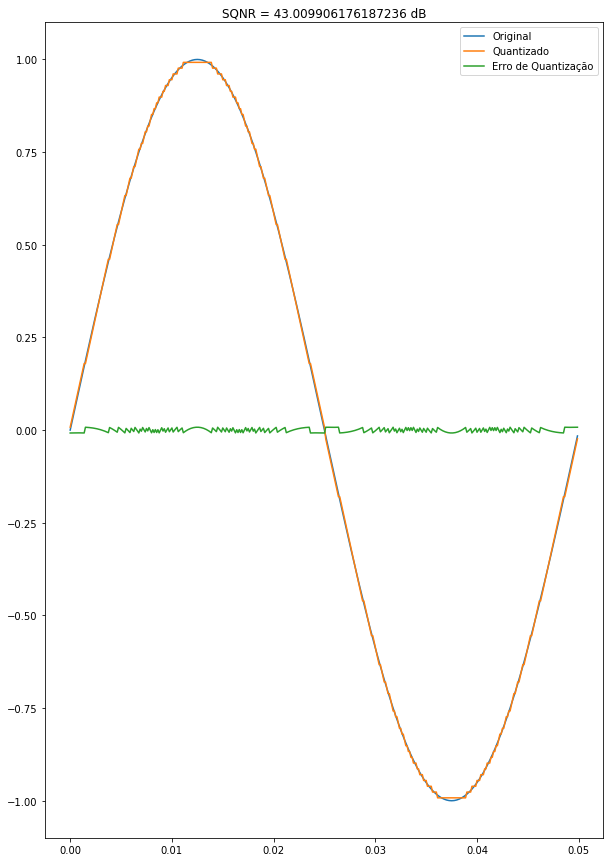

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
L= [128];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[10,15])
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    
    # Calculo de SQNR (dB)
    SQNR = np.mean(20*np.log10(np.abs(m_t[1:])/(np.abs(m_t[1:]-q_out[1:]))))

    
    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('SQNR = {} dB'.format(SQNR))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
    
plt.show()

## Questão 2


Pn =

    0.0500


Pn =

  -13.0082



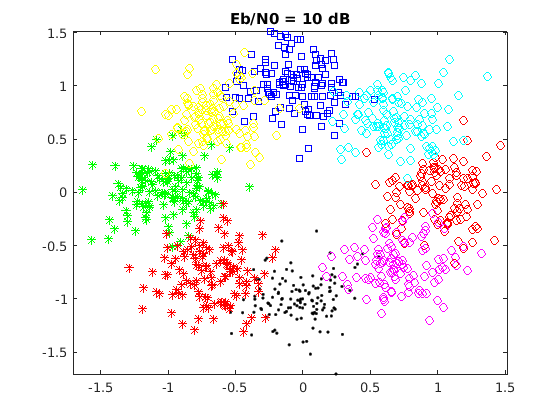

In [51]:
clear;clc;
% Parâmetros
EbN0_dB = [10];         % Eb/N0 de entrada
Ns = 10^3;              % Número de símbolos simulados
M = 8;                  % Número de símbolo da modulação BPSK

    bits8 = randi([0 M-1],Ns,1);
    txSig = pskmod(bits8,M);
    rxSig = awgn(txSig,EbN0_dB);
    
    u = unique(txSig);
    
    % Gráficos
    figure(1);
    plot(rxSig(find(txSig==u(1))),'ro')
    hold on;
    plot(rxSig(find(txSig==u(2))),'bs')
    hold on;
    plot(rxSig(find(txSig==u(3))),'g*')
    hold on;
    plot(rxSig(find(txSig==u(4))),'k.')
    hold on;
    plot(rxSig(find(txSig==u(5))),'mo')
    hold on;
    plot(rxSig(find(txSig==u(6))),'co')
    hold on;
    plot(rxSig(find(txSig==u(7))),'yo')
    hold on;
    plot(rxSig(find(txSig==u(8))),'r*')
    hold on;
    title(['Eb/N0 = ' num2str(EbN0_dB) ' dB']);
    minAx = min([real(rxSig)' imag(rxSig)']);
    maxAx = max([real(rxSig)' imag(rxSig)']);
    axis([minAx maxAx minAx maxAx]);


t=linspace(0,5,Ns);
x = abs(u(1))*cos(2*pi*10*t+100);
Ps = sum(abs(x.^2))/length(t);

SNR = 10^(EbN0_dB/10);

Pn = Ps/SNR
Pn = 10*log10(Pn)

## Questão 3


Pe =

    0.0092



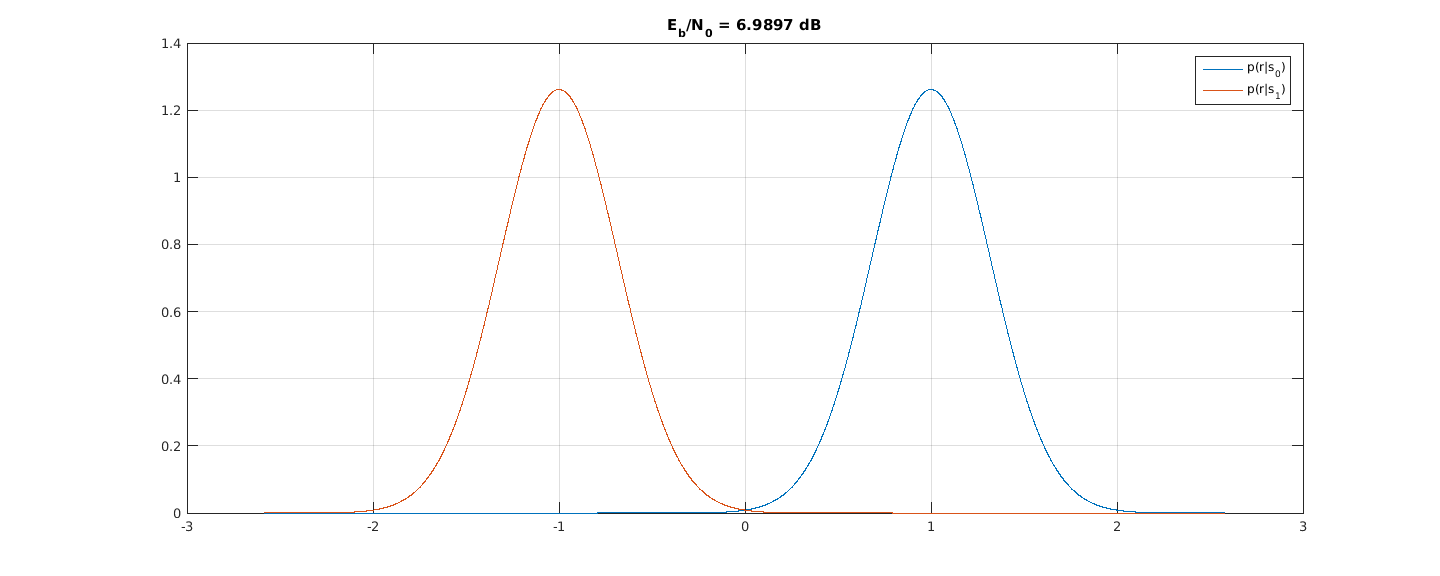

In [75]:
clc;clear all;close all;
%% Parâmetros
Eb = 1;                            % Energia dos pulsos (normalizada para 1)
Er0 = Eb;                          % Média da saída do correlator quando s0 é transmitido
Er1 = -Eb;                         % Média da saída do correlator quando s1 é transmitido
vtEbN0 = 5;                        % Eb/N0s a simular em linear
vtEbN0_dB = 10*log10(vtEbN0);      % Eb/N0s a simular em dB

vtVar = Eb*Eb./vtEbN0/2;           % Variância na entrada do detector (= EN0/2)
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 15 6];

for ik = 1 : length(vtEbN0_dB)
    dStd = sqrt(vtVar(ik));
    x=-5*dStd-Eb:0.001:5*dStd+Eb;  % Eixo (5*variância)
    
    Pe = qfunc(sqrt(2*vtEbN0_dB(ik)))*100
    
    %% Cálculo da distribuição Gausiana
    vtr_0 = normpdf(x,Er0,dStd);   % Valores de r (distribuição de probalilidade r|s0)
    vtr_1 = normpdf(x,Er1,dStd);   % Valores de r (distribuição de probalilidade r|s1)
    %% Gráficos
    %
    subplot(length(vtEbN0_dB),1,ik)
    plot(x,vtr_0,x,vtr_1);
    title(['E_b/N_0 = ' num2str(vtEbN0_dB(ik)) ' dB']);
    legend('p(r|s_0)','p(r|s_1)');
    grid;
end


## Questão 4

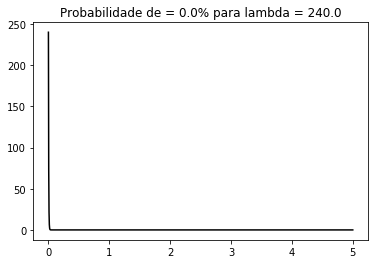

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sympy import *

# Cálculo da probabilidade
def calc_prob(sigma):
    mu = 0                                       # Média
    T=0.001                                      # Taxa de amostragem
    x=np.arange(0,5+T,T)                        # Eixo x
    DistExp=stats.expon.pdf(x,mu,sigma)         # Distribuição exponencial
    
    ind = x.tolist().index(4)
    indices = np.arange(int(ind)+1, len(x))
    prob1=np.sum(DistExp[indices])*T*100        # Probabilidade de um evento ocorrer no intervalo
    plt.plot(x,DistExp,'k')                                       
    plt.title('Probabilidade de = ' + str(prob1) +'% para lambda = ' + str(1/sigma))      # Mostra valor verdadeiro de prob1
    plt.fill_between(x[indices],DistExp[indices],facecolor='midnightblue')
    plt.show()


# Distribuição

lamb1 = 240; sigma1 = 1/lamb1

calc_prob(sigma1)


## Questão 5

Erro médio quadrático:  0.201570169273


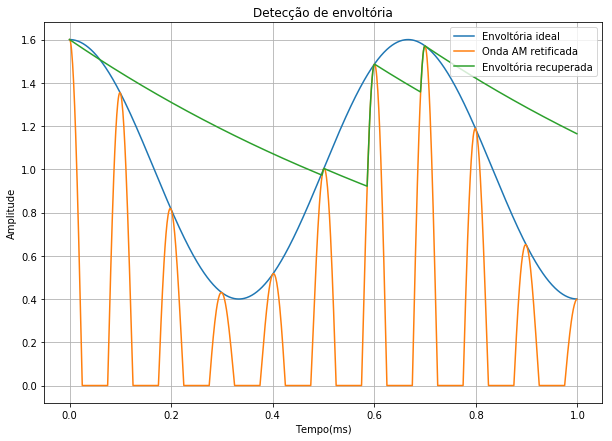

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

tau = 1e-3                                                      # Constante de tempo do detector de envelope
Ts=1e-6                                                         # Definição do período
t = np.arange(1000)*Ts                                          # Definição do vetor tempo
fc = 10000                                                      # Frequência da portadora.
fm = 1500                                                       # Frequência do sinal
Mu = 0.6                                                        # Índice de modulaçao.
Ac = 1.0
x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env = np.zeros(len(x_AM))
Ns = len(x_AM)
out = -1
for i in range(Ns):
    inp = x_AM[i]
    if inp>=out:
        out = inp            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out *= (1-Ts/tau)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env[i] = out

print('Erro médio quadrático: ', sum((x_env-x_envIdeal)**2)/len(x_env))

# gráfico composto
plt.figure(1,[10,7])
plt.title("Detecção de envoltória")
plt.ylabel("Amplitude")
plt.xlabel("Tempo(ms)")
envoltoria_ideal = plt.plot(t*1000,x_envIdeal)
sinal_transmitido = plt.plot(t*1000,x_AM)
detector_de_saida = plt.plot(t*1000,x_env)
plt.grid()
plt.legend(["Envoltória ideal","Onda AM retificada","Envoltória recuperada"])
plt.show()